In [1]:
import SpectralSynthesis as ss
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from matplotlib.patches import Ellipse

C:\Users\C1764397\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
model = tf.keras.models.load_model('D:/ExponentiatedNonPeriodicNoisy/5-conv-256-nodes-4-dense-200-epochs-1545224860.model')

In [9]:
H_list = [0,0.25,0.5,0.75,1]
sigma_list = [0.1,0.75,1.5,2.25,3]


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]C:\Users\C1764397\Workshop\PhD\Scripts\SpectralSynthesis.py:58: RuntimeWarning: divide by zero encountered in reciprocal
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)

 20%|████████████████▌                                                                  | 1/5 [02:06<08:24, 126.21s/it]C:\Users\C1764397\Workshop\PhD\Scripts\SpectralSynthesis.py:58: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [11:40<00:00, 140.19s/it]


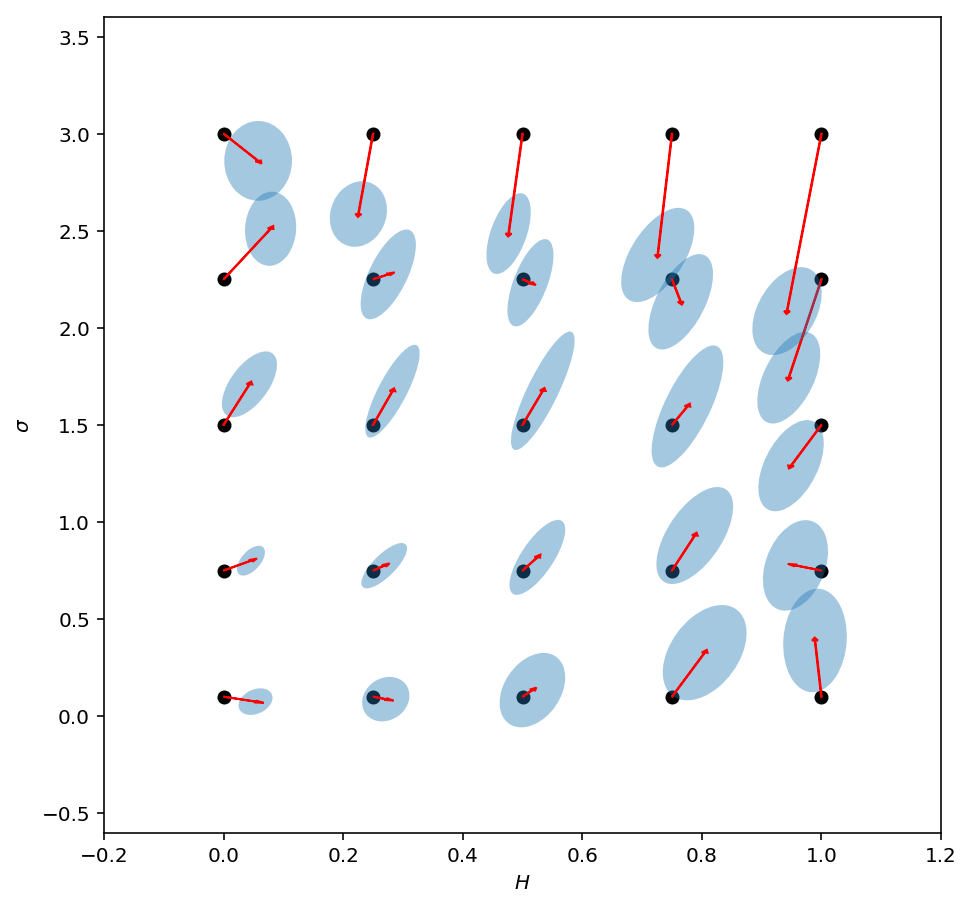

In [14]:
plt.figure(figsize=(1080/144,1080/144),dpi=144)
ax=plt.subplot(111)
for h in tqdm(H_list):
    for sigma in sigma_list:
        predictions = []
        for i in range(0,200):
            X = ss.fBm(E=2,N=400,H=h,sigma=sigma,exp=True)
            X = X[150:250,150:250]
            m_1_X = np.mean(X)
            s_1_X = np.std(X)
            m_2_X = 0
            s_2_X = 1/4

            X *= s_2_X/s_1_X
            X += (m_2_X-m_1_X*s_2_X/s_1_X)
            X = np.array(X).reshape(-1, 100, 100, 1)
            prediction = model.predict(X)
            predictions.append([prediction[0],prediction[1]])
        predictions = np.reshape(np.asarray(predictions),(-1,2)).T
        cov = np.cov(predictions[0],predictions[1])
        lambda_, v = np.linalg.eig(cov)
        lambda_ = np.sqrt(lambda_)
        ell = Ellipse(alpha=0.4,xy = (np.mean(predictions[0]),np.mean(predictions[1])),width = lambda_[0]*2,height = lambda_[1]*2,angle = np.rad2deg(np.arccos(v[0,0])))
        ell.set_facecolor('C0')
        ax.add_artist(ell)
        plt.arrow(h,sigma,np.mean(predictions[0])-h,np.mean(predictions[1])-sigma,color='red',head_width = 0.01)
        plt.scatter(h,sigma,color='k')     
        
plt.xlim(-0.2,1.2)
plt.ylim(-0.6,3.6)
plt.xlabel(r'$H$')
plt.ylabel(r'$\sigma$')
plt.savefig('D:/ExponentiatedNonPeriodicNoisy/EllipsePlot.png')
plt.show()

In [6]:
print(np.mean(predictions[0]),np.mean(predictions[1]))
cov = np.cov(predictions[0],predictions[1])
lambda_, v = np.linalg.eig(cov)
lambda_ = np.sqrt(lambda_)
print(cov)

0.536852 1.6626053
[[0.00308529 0.01475632]
 [0.01475632 0.0988723 ]]


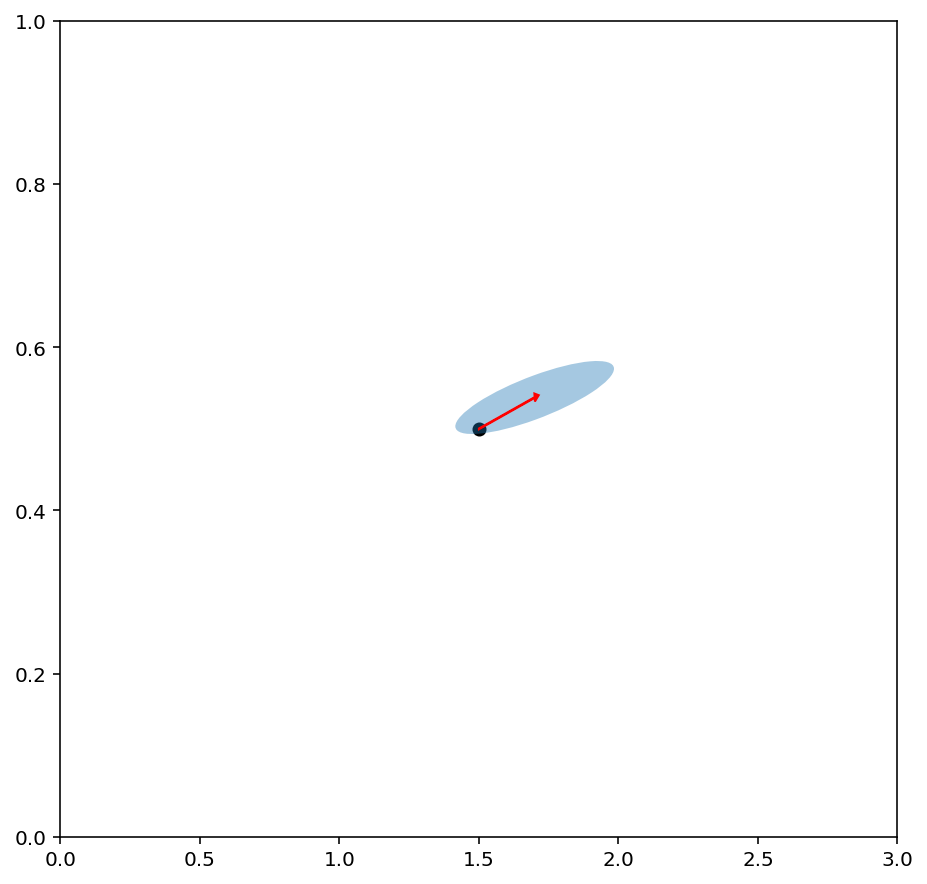

In [81]:
from matplotlib.patches import Ellipse

plt.figure(figsize=(1080/144,1080/144),dpi=144)
ax=plt.subplot(111)
ell = Ellipse(alpha=0.4,xy = (np.mean(predictions[0]),np.mean(predictions[1])),width = lambda_[0]*2,height = lambda_[1]*2,angle = np.rad2deg(np.arccos(v[0,0])))
ell.set_facecolor('C0')
ax.add_artist(ell)
plt.arrow(H_list[0],sigma_list[0],np.mean(predictions[0])-H_list[0],np.mean(predictions[1])-sigma_list[0],color='red',head_width = 0.01)
plt.scatter(H_list,sigma_list,color='k')
plt.xlim(0,3)
plt.ylim(0,1)
plt.show()